In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./df_mass.csv')

## The distribution of EDER

In [ ]:
def draw_distro_hist(h):
    for k in range(14):
        for gid in [1, 2, 3, 4]:
        data = df[(df['Case'] == k) & (df['gid'] == gid)]
        draw_distro_hist_helper(data, 'EDER', (0, 1.1), h)
        draw_distro_hist_helper(data, 'DOR', (0, 1.1), h)

def draw_distro_hist_helper(data, var, rng, h):
    plt.figure(figsize = (11,6))
    sns.set(font_scale = 2.2)
    sns.set_style('whitegrid', {'font.family':'serif', 'font.serif':'Times New Roman'})
    sns.distplot(data[data['Type'] == 'CPF'][var].values, label = 'CPF', hist=h)#, color=c("blue"))
    sns.distplot(data[data['Type'] == 'ICRB'][var].values, label = 'ICRB', hist=h)#, color=c("green"))
    sns.distplot(data[data['Type'] == 'STO'][var].values, label = 'STO', hist=h)#, color=c("orange"))
    g = sns.distplot(data[data['Type'] == 'Rand'][var].values, label = 'Rand', hist=h)#, color=c("red"))
    g.set_xlabel(var, fontsize=18)
    g.set_ylabel("Frequency", fontsize=18)
    g.set(ylim=(0, None), xlim=rng)
    plt.legend(loc='upper left')
    plt.show()
    fig = g.get_figure()
    fig.savefig('./distro_hist/hist_g' + str(gid) + '_k' + str(k) + '_' + var + '.eps')

In [ ]:
draw_distro_hist(True)

## Standard deviation of different heuristics

In [ ]:
def get_std(k, gid, Type):
    vertex_num = [0, 12, 25, 41, 19]
    data = df[(df['Case'] == k) & (df['gid'] == gid) & (df['Type'] == Type)]
    return data['EDER'].values.std(), data['DOR'].values.std()/(vertex_num[gid]-1)
    
def nm_std():
    T = ['CPF', 'ICRB', 'STO']
    d = pd.DataFrame(columns=('Type', 'Standard Deviation of EDER', 'Standard Deviation of DOR'))
    cnt = 0
    for i, h in enumerate(T):
        for gid in [1, 2, 3, 4]:
            for k in range(14):
                r, t = get_std(k, gid, h)
                d.loc[cnt] = [h, r, t]
                cnt += 1
    return d

def draw_std():
    d = nm_std()
    draw_std_helper(d, 'Standard Deviation of EDER')
    draw_std_helper(d, 'Standard Deviation of DOR')

def draw_std_helper(d, yaxis):
    xaxis = 'Type'
    plt.figure(figsize = (3,5))
    sns.set(font_scale = 1.4)
    sns.set_style('whitegrid', {'font.family':'serif', 'font.serif':'Times New Roman'})
    fig = sns.catplot(x=xaxis, y=yaxis, data=d, kind="box")
    fig.savefig('./heuristics/heu'+ '_' + yaxis + '.eps')

In [ ]:
draw_std()

## Barplot for each case

In [10]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(4, 1)
gs.update(wspace=0.025, hspace=0.15)

def draw_bar(gid, xaxis, yaxis, d):
    dd = ['', 'a', 'b', 'c', 'd']
    plt.subplot(gs[gid-1])
    ax = sns.barplot(x=xaxis, y=yaxis, hue="Type", data=d[d['gid'] == gid], ci = None)
    plt.ylabel('Task ' + dd[gid])
    if gid < 4:
        ax.axes.get_xaxis().set_visible(False)
        ax.get_legend().remove()
    else:
        plt.xlabel('')
        ax.legend(loc='lower center', bbox_to_anchor= (0.5,-0.5), ncol=4, borderaxespad=0, frameon=False)

def draw_stacked_bar(gid, xaxis, yaxis1, yaxis2, d):
    dd = ['', 'a', 'b', 'c', 'd']
    plt.subplot(gs[gid-1])
    ax = sns.barplot(x=xaxis, y=d[yaxis1],
                     hue="Type", data=d[d['gid'] == gid], ci = None, palette=sns.color_palette('pastel'))
    ax = sns.barplot(x=xaxis, y=d[yaxis2],
                     hue="Type", data=d[d['gid'] == gid], ci = None, palette=sns.color_palette('dark'))
    # ax = sns.barplot(x=xaxis, y=d[yaxis3],
    #                  hue="Type", data=d[d['gid'] == gid], ci = None, palette=sns.color_palette())
    # ax.set(ylim=(0,1))
    plt.ylabel('Task ' + dd[gid])
    if gid < 4:
        ax.axes.get_xaxis().set_visible(False)
        ax.get_legend().remove()
    else:
        plt.xlabel('')
        # ax.get_legend().remove()
        ax.legend(['CPF', 'ICRB', 'STO', 'Rand'], loc='lower center', bbox_to_anchor= (0.5,-0.5), ncol=4, borderaxespad=0, frameon=False)

def draw_bars(bartype):
    xaxis = 'Case'

    plt.figure(figsize = (40, 14))
    sns.set(font_scale = 2.75)
    sns.set_style('whitegrid', {'font.family':'serif', 'font.serif':'Times New Roman'})
    
    if bartype == 'EDER':
        for gid in [1, 2, 3, 4]:
            draw_bar(gid, xaxis, 'EDER', df)
        plt.savefig('./bar/EDER.pdf')
    elif bartype == 'DOR':
        for gid in [1, 2, 3, 4]:
            draw_bar(gid, xaxis, 'DOR', df)
        plt.savefig('./bar/DOR.pdf')
    elif bartype == 'Time':
        for gid in [1, 2, 3, 4]:
            draw_bar(gid, xaxis, 'Time', df)
        plt.savefig('./bar/Time.pdf')
    elif bartype == 'Time_heft':
        for gid in [1, 2, 3, 4]:
            draw_stacked_bar(gid, xaxis, 'Time', 'Heft Time', df)
            # draw_stacked_bar(gid, xaxis, 'Time', 'Memory Constraint Time', 'Heft Time', df)
        plt.savefig('./bar/Time_heft.pdf')
    else:
        for gid in [1, 2, 3, 4]:
            draw_stacked_bar(gid, xaxis, 'Total Pct.', 'Calculation Pct.', df)
        plt.savefig('./bar/PCT.pdf')

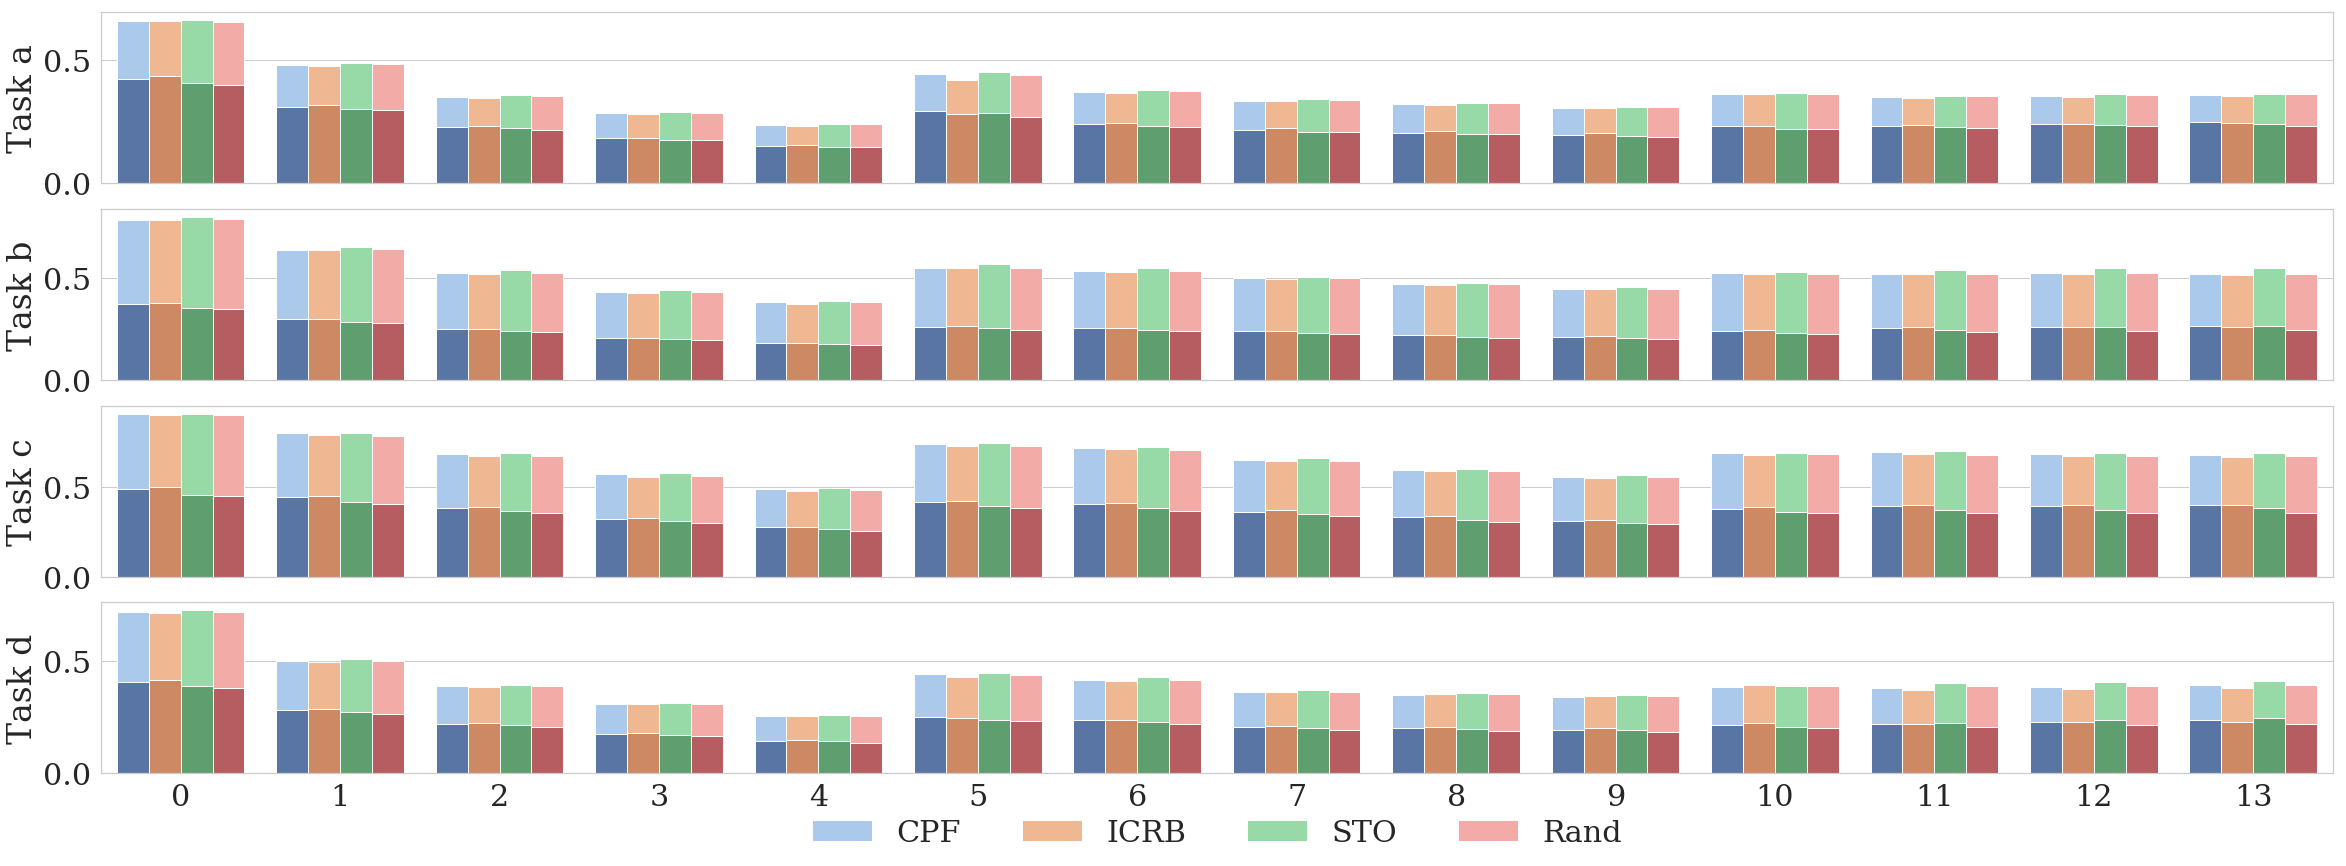

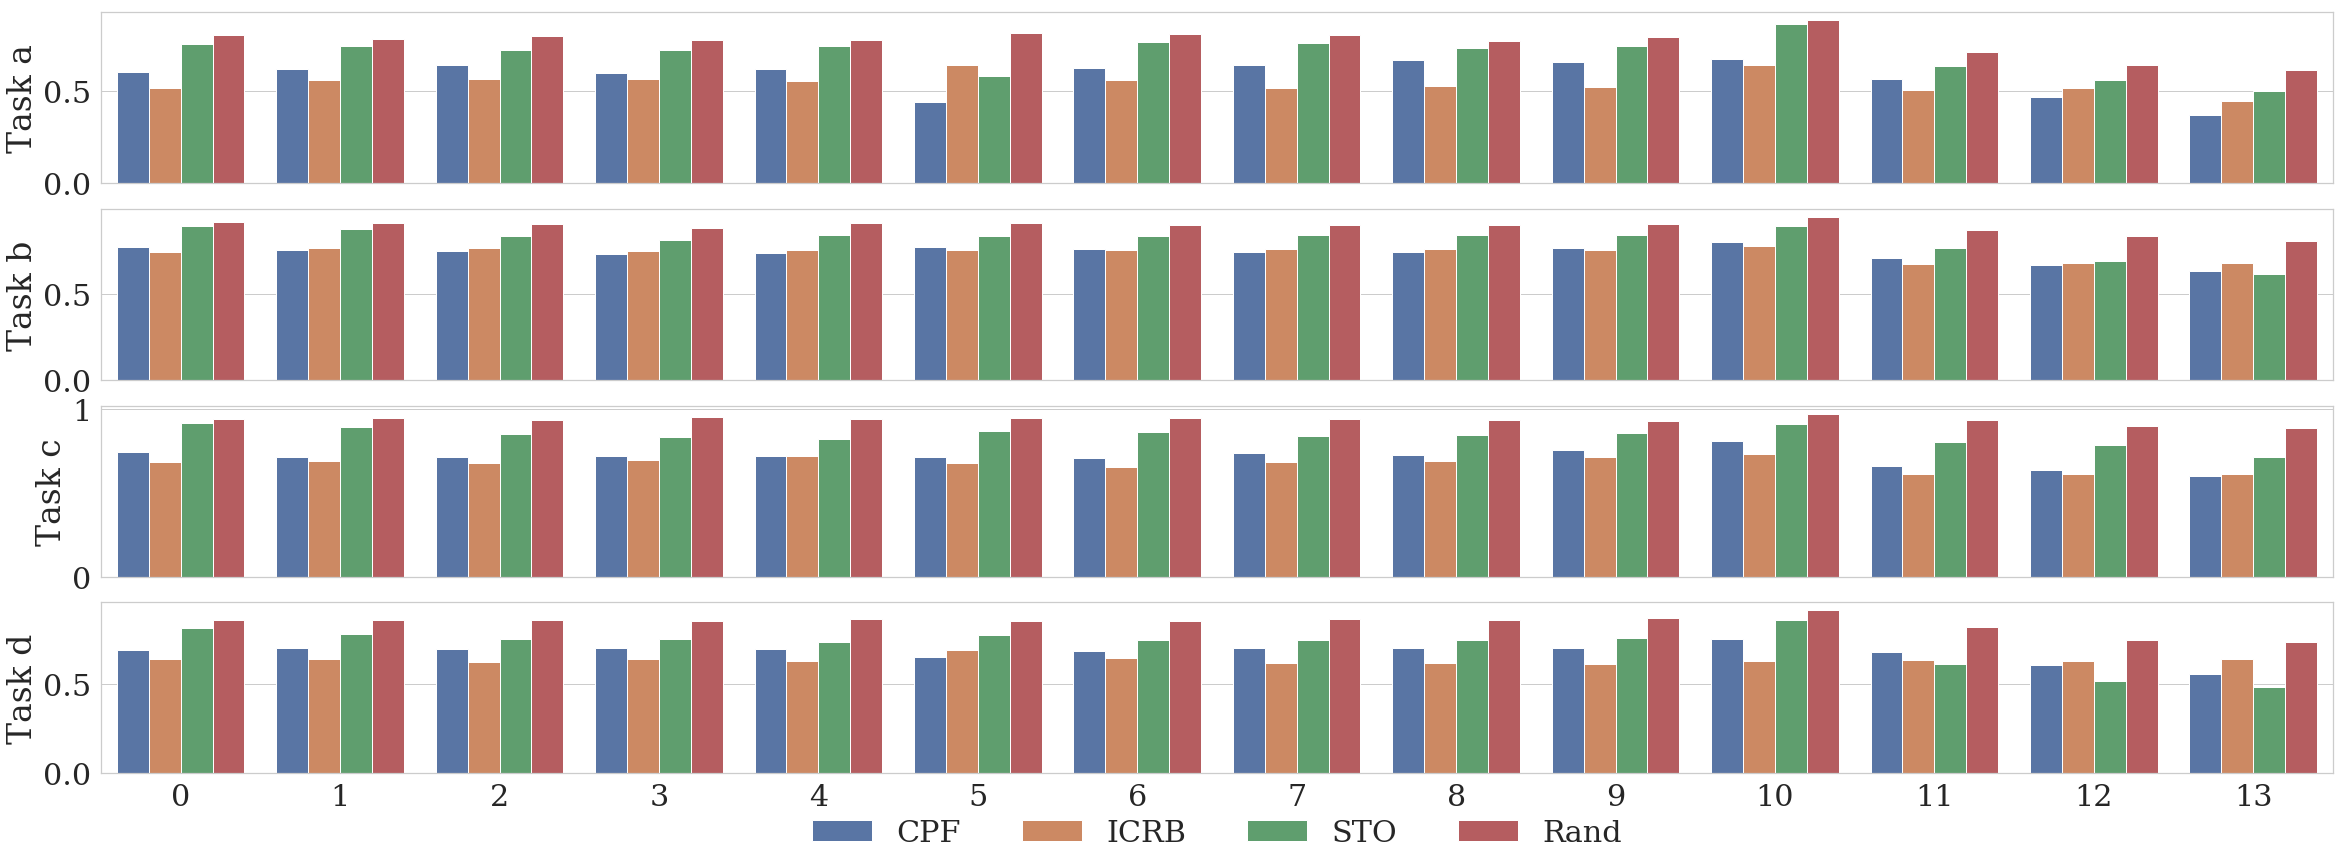

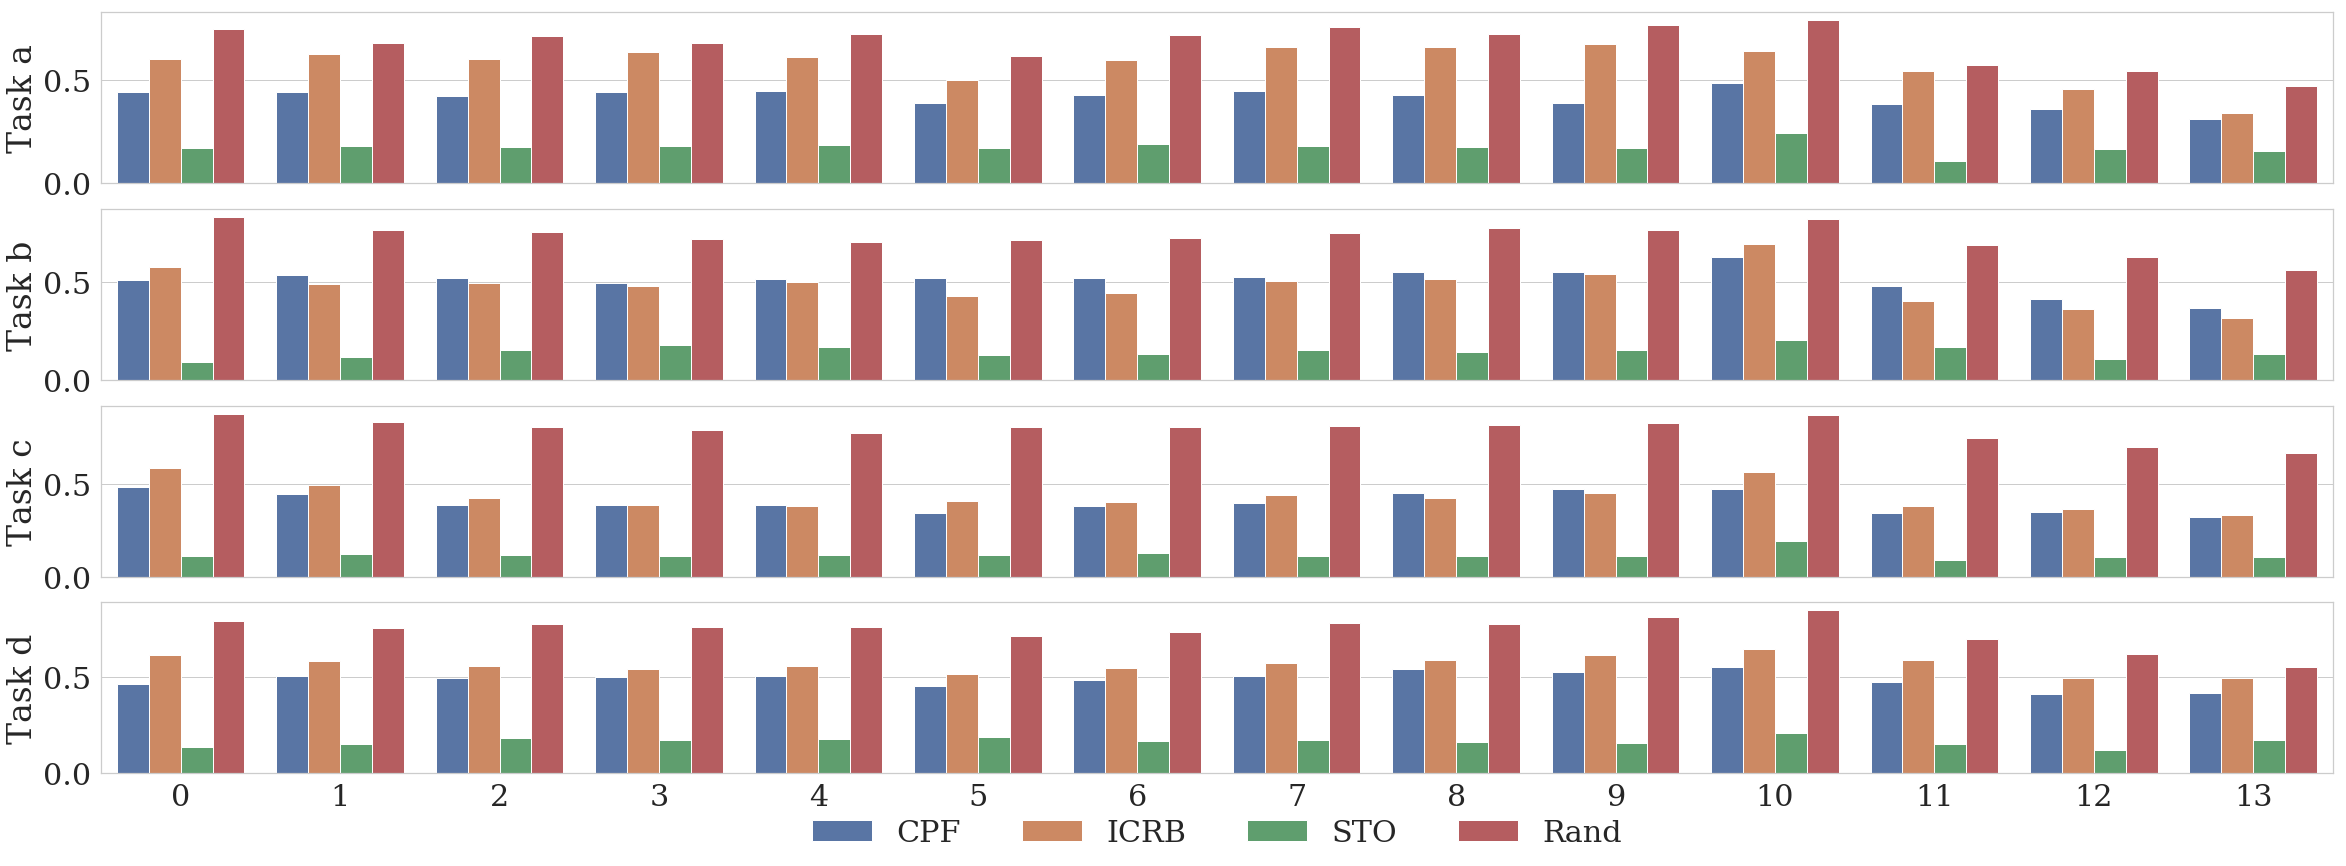

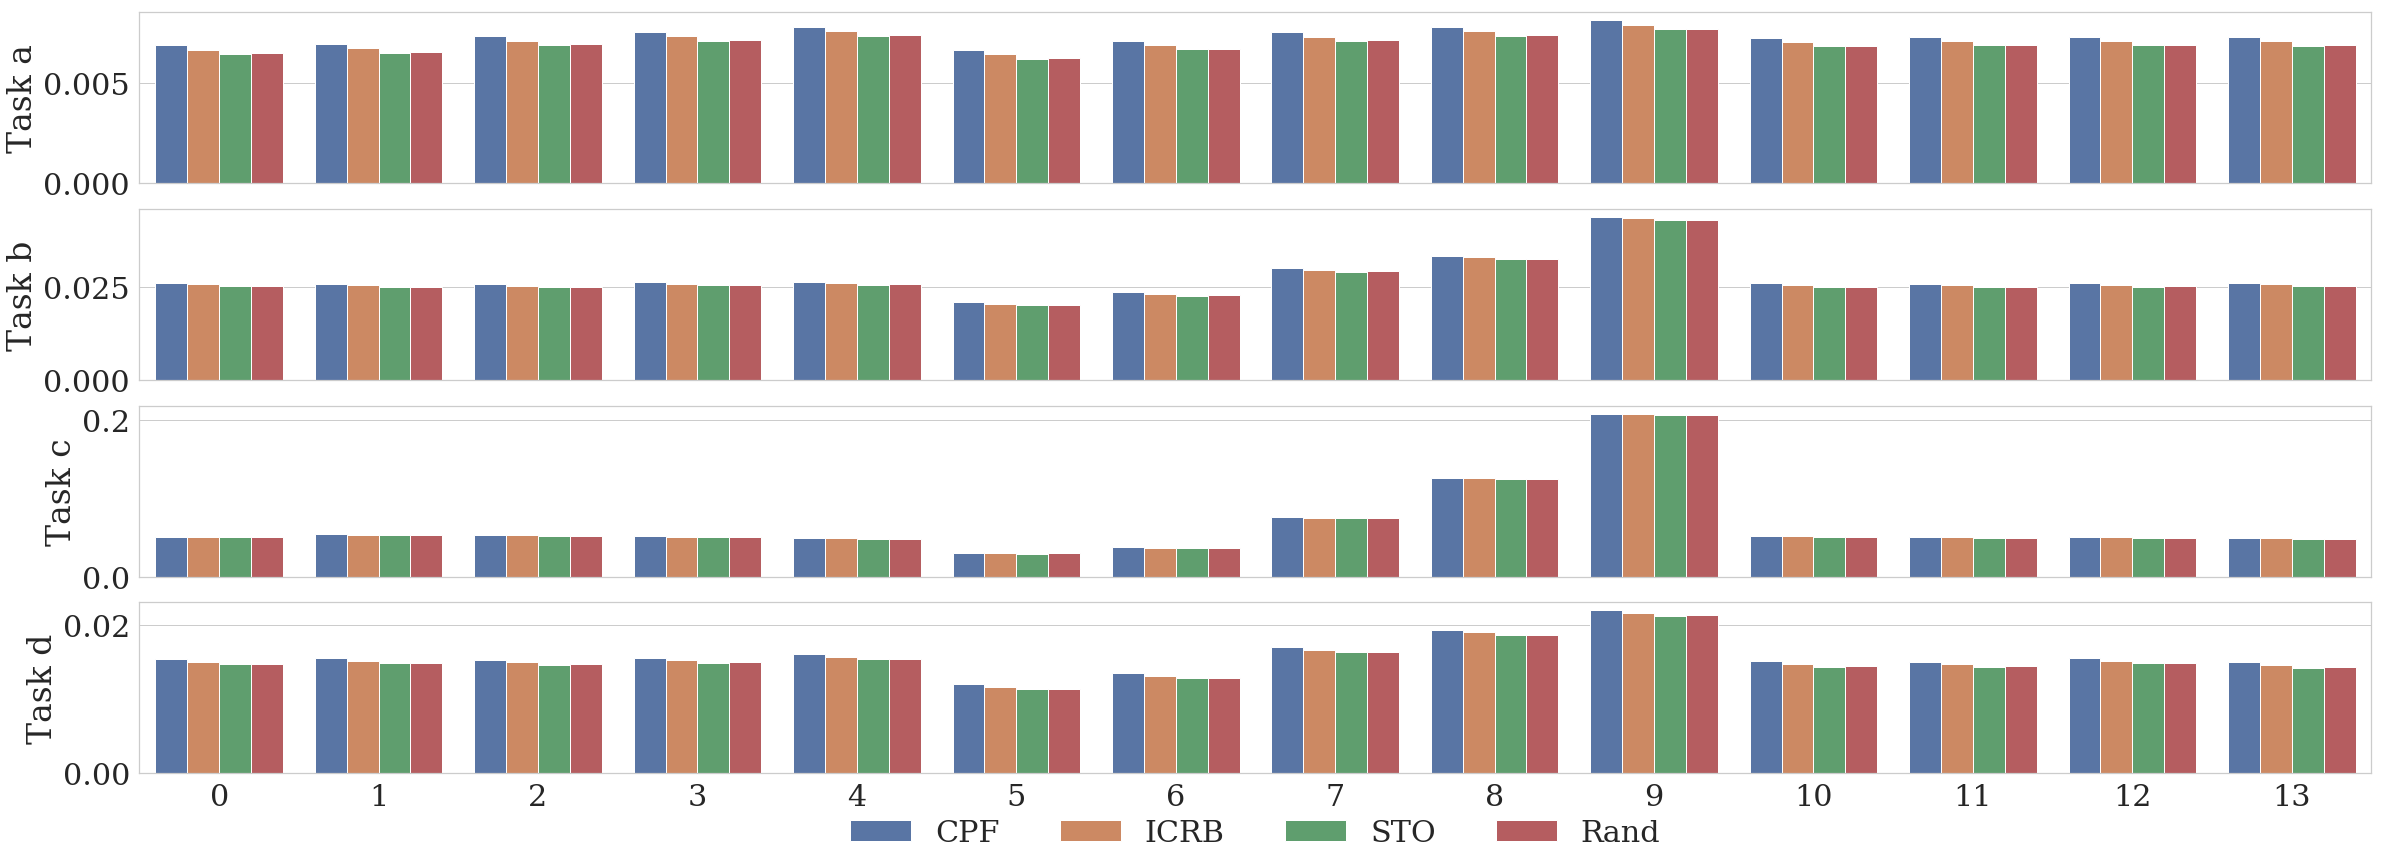

In [4]:
draw_bars('PCT')
draw_bars('EDER')
draw_bars('DOR')
draw_bars('Time')

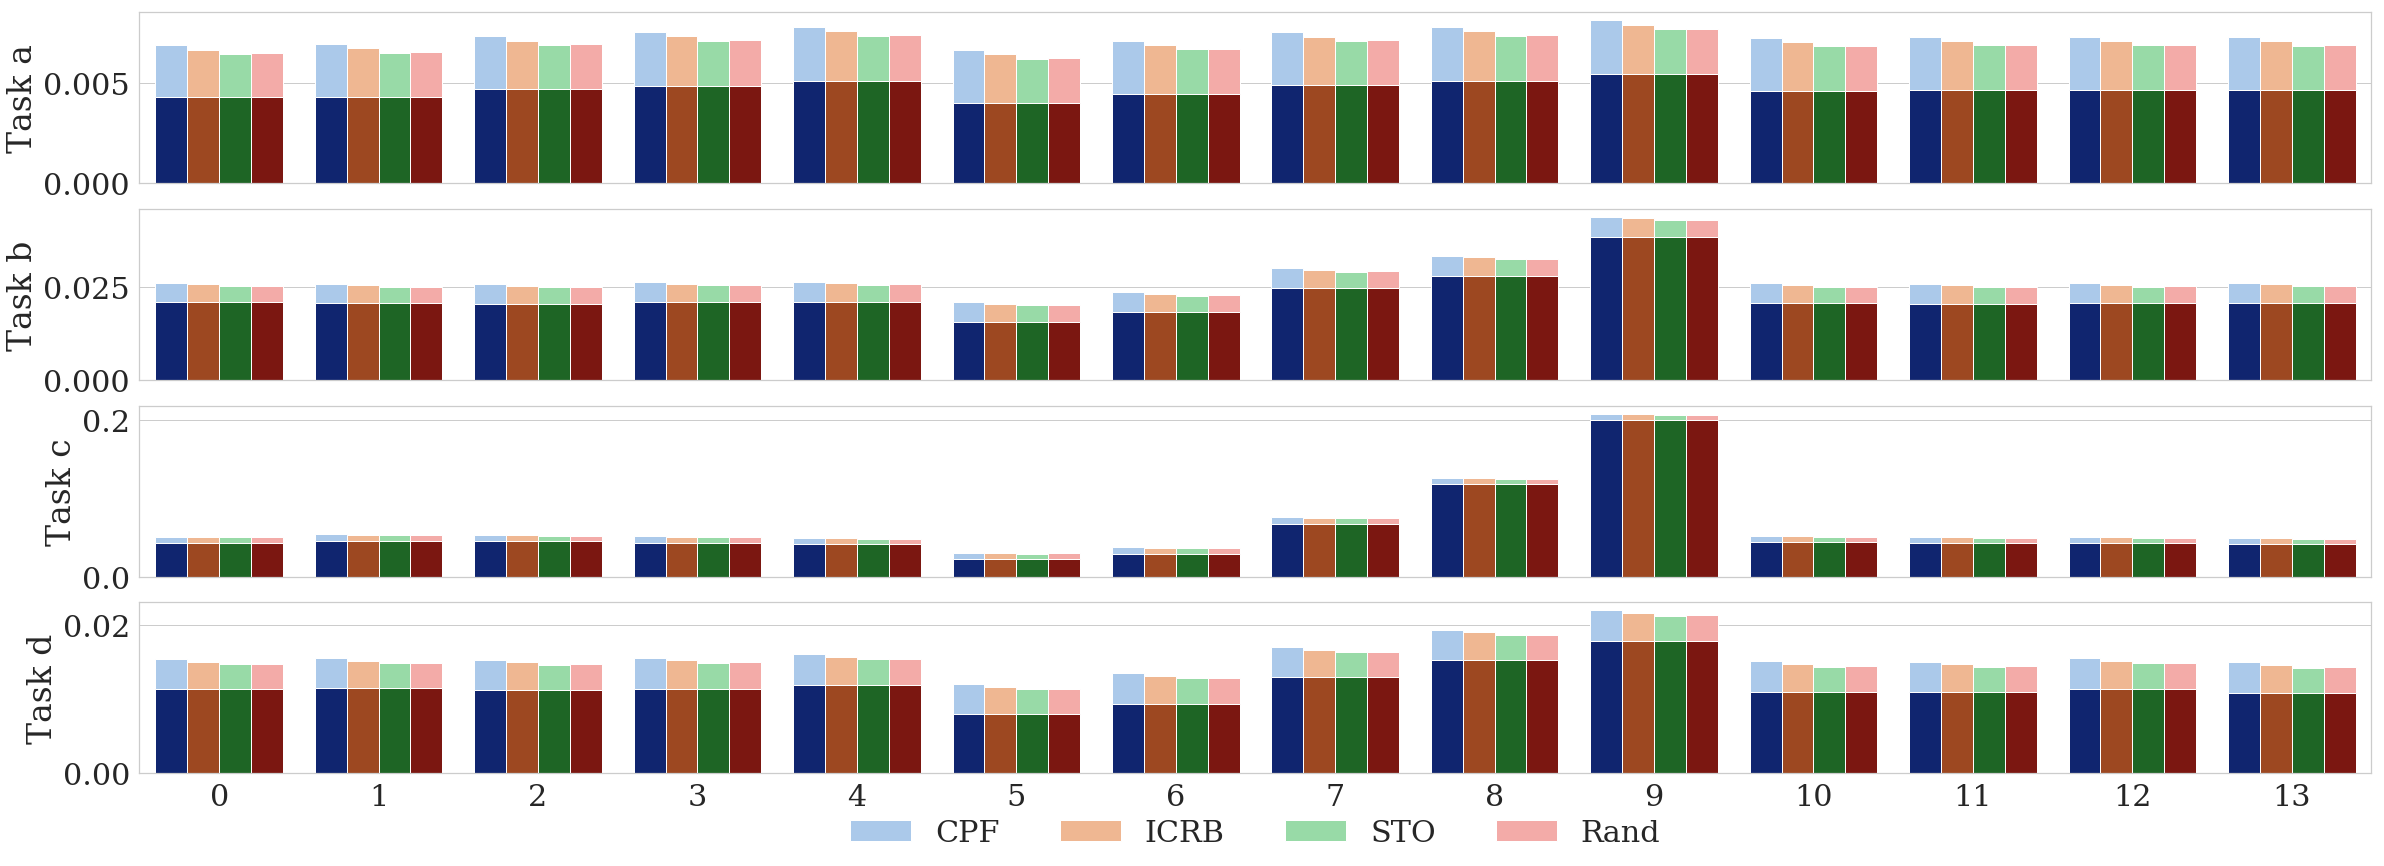

In [11]:
draw_bars('Time_heft')

In [18]:
def draw_brute_force_bar(gid, xaxis, yaxis, d):
    plt.figure(figsize = (25, 4))
    sns.set(font_scale = 2.75)
    sns.set_style('whitegrid', {'font.family':'serif', 'font.serif':'Times New Roman'})
    dd = ['', 'a', 'b', 'c', 'd']
    ax = sns.barplot(x=xaxis, y=yaxis, hue="Type", data=d[d['gid'] == gid], ci = None)
    plt.ylabel('Task ' + dd[gid])
    ax.legend(loc='lower center', bbox_to_anchor= (0.5,-0.6), ncol=5, borderaxespad=0, frameon=False)
    plt.savefig('./bar/search.pdf')

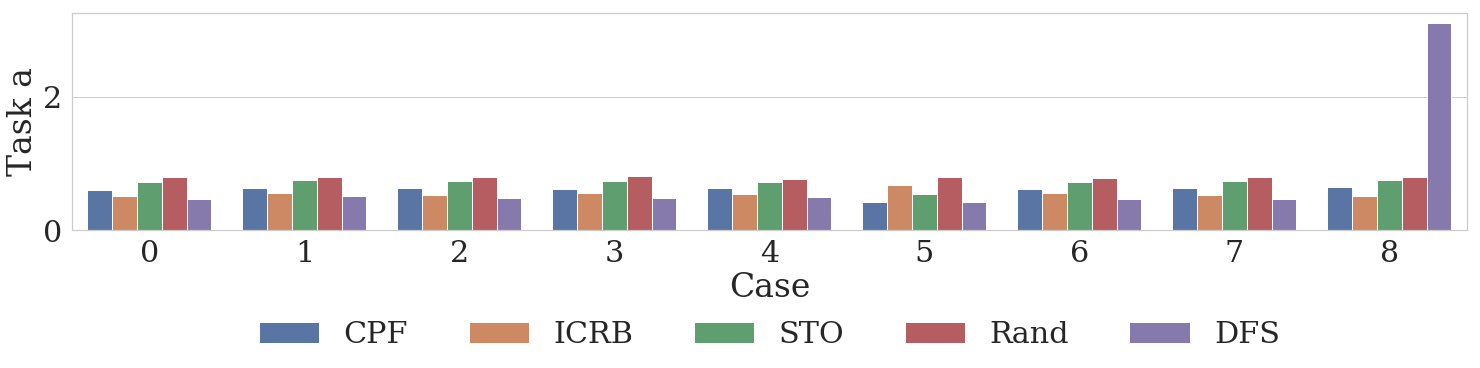

In [21]:
df = pd.read_csv('./df.csv')
draw_brute_force_bar(1, 'Case', 'EDER', df)

In [7]:
!sh ./run.sh

./run.sh: 1: ./run.sh: Syntax error: Bad for loop variable
